# Training Job
#### In this notebook we will focus on reading the data that we pre-processed previouslly and then start training

In [5]:
import boto3
import sagemaker
from sagemaker import get_execution_role

region = boto3.session.Session().region_name
role = get_execution_role()

## 1. Reading Data 

In [6]:
import argparse
import os
import warnings

import pandas as pd
import pathlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


In [11]:
features_loc = "pre-processed data/"

train_ds = tf.data.experimental.load(features_loc + "train/")
val_ds = tf.data.experimental.load(features_loc + "val/")
test_ds = tf.data.experimental.load(features_loc + "test/")
commands = d = np.load(features_loc + "labels/commands.npy")

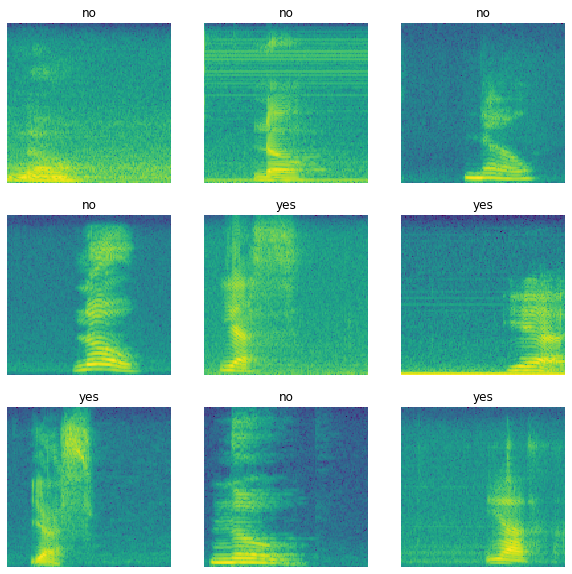

In [13]:
import matplotlib.pyplot as plt
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(val_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()